In [1]:
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os
import albumentations 
import shutil
import numpy as np
import random

In [234]:
imageGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data = imageGenerator.flow_from_directory('Data', target_size=(200, 200), batch_size=4, class_mode='binary')
val_data = imageGenerator.flow_from_directory('VAL', target_size=(200, 200), batch_size=4, class_mode='binary')
train_data.image_shape

Found 67 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


(200, 200, 3)

In [235]:
xception = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
model = tf.keras.Sequential()
model.add(xception)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [236]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_26 (Flatten)        (None, 100352)            0         
                                                                 
 dense_65 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_27 (Dropout)        (None, 1024)              0         
                                                                 
 dense_66 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 123,623,977
Trainable params: 123,569,449
Non-trainable params: 54,528
_________________________________________________________________


In [237]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

In [238]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [239]:
hist = model.fit(train_data, epochs=20, validation_data=val_data)

Epoch 1/20
17/17 [==============================] - 8s 198ms/step - loss: 0.3603 - accuracy: 0.8806 - val_loss: 0.7242 - val_accuracy: 0.4746
Epoch 2/20
17/17 [==============================] - 2s 96ms/step - loss: 0.1607 - accuracy: 0.9104 - val_loss: 0.7575 - val_accuracy: 0.5932
Epoch 3/20
17/17 [==============================] - 2s 123ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.7691 - val_accuracy: 0.2881
Epoch 4/20
17/17 [==============================] - 2s 130ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.8109 - val_accuracy: 0.5932
Epoch 5/20
17/17 [==============================] - 2s 137ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.8370 - val_accuracy: 0.6949
Epoch 6/20
17/17 [==============================] - 3s 154ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.7992 - val_accuracy: 0.6949
Epoch 7/20
17/17 [==============================] - 3s 157ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7419 - val_accuracy: 0.6949
Epoch 8

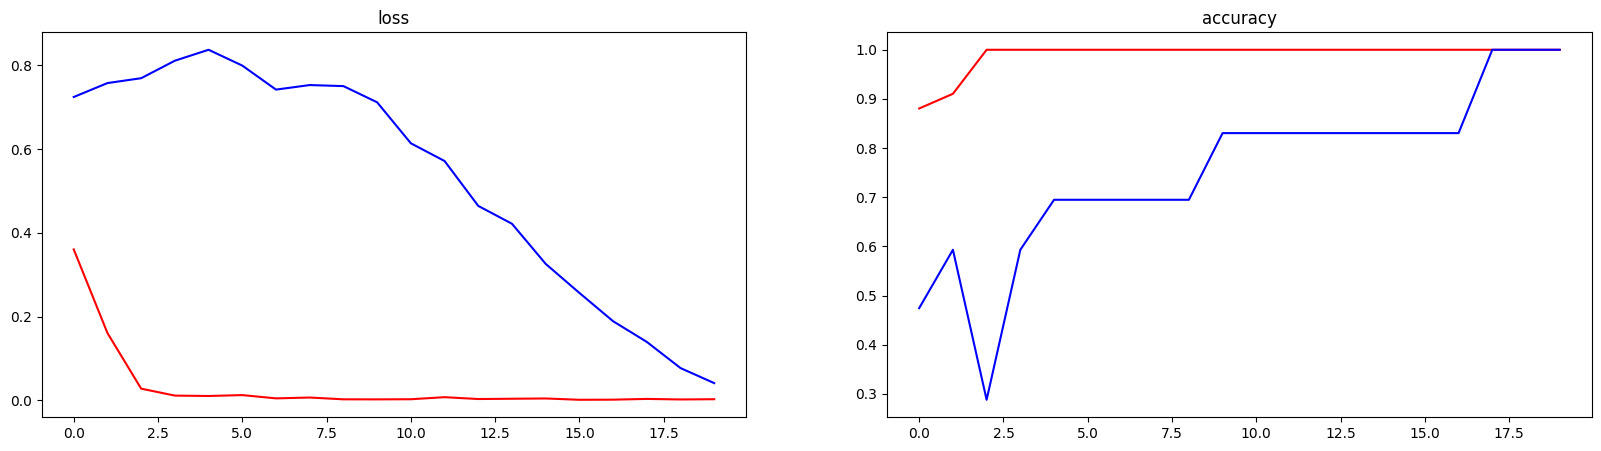

In [240]:
_, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(hist.history['loss'], label='loss', color='red')
ax[0].plot(hist.history['val_loss'], label='val_loss', color='blue')
ax[0].set_title('loss')

ax[1].plot(hist.history['accuracy'], label='accuracy', color='red')
ax[1].plot(hist.history['val_accuracy'], label='val_accuracy', color='blue')
ax[1].set_title('accuracy')
plt.show()

In [245]:
img = cv2.imread('Data/kOK/frame13.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (200, 200))
img = img.reshape(1,200,200,3)
img_normal = img/255

In [246]:
test = model.predict(img_normal)
print(test)

1/1 [==============================] - 0s 29ms/step
[[0.7098353]]


In [20]:
train_data.class_indices

{'OK': 0, 'kOK': 1}

In [247]:
model.evaluate(val_data)

15/15 [==============================] - 1s 23ms/step - loss: 0.0411 - accuracy: 1.0000


[0.04108990356326103, 1.0]

In [248]:
img_test = []
img_test_predict = []
for file in os.listdir('VAL/kOK'):
    img = cv2.imread(f'VAL/kOK/{file}')
    img_test.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (200, 200))
    img = img/255
    img = img.reshape(1,200,200,3)
    img_test_predict.append(model.predict(img)[0])
for file in os.listdir('VAL/OK'):
    img = cv2.imread(f'VAL/OK/{file}')
    img_test.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (200, 200))
    img = img/255
    img = img.reshape(1,200,200,3)
    img_test_predict.append(model.predict(img)[0])

1/1 [==============================] - 0s 22ms/step


33
13
29
4


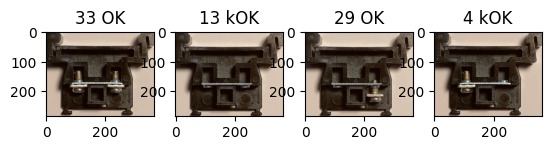

In [261]:
_, ax = plt.subplots(ncols=4)

i = random.randint(0,len(img_test_predict))
print(i)
ax[0].imshow(img_test[i])
ax[0].set_title(f'{i} ' + ('OK' if img_test_predict[i] < 0.5 else 'kOK'))

i = random.randint(0,len(img_test_predict))
print(i)
ax[1].imshow(img_test[i])
ax[1].set_title(f'{i} ' + ('OK' if img_test_predict[i] < 0.5 else 'kOK'))

i = random.randint(0,len(img_test_predict))
print(i)
ax[2].imshow(img_test[i])
ax[2].set_title(f'{i} ' + ('OK' if img_test_predict[i] < 0.5 else 'kOK'))

i = random.randint(0,len(img_test_predict))
print(i)
ax[3].imshow(img_test[i])
ax[3].set_title(f'{i} ' + ('OK' if img_test_predict[i] < 0.5 else 'kOK'))
plt.show()

In [262]:
model.save('25_03_2024_x_lite.h5')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 38400)             0         
                                                                 
 dense_43 (Dense)            (None, 1024)              39322624  
                                                                 
 batch_normalization_222 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_44 (Dense)            (None, 1)               